In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from HC import *
from SA import *
from ACO import *
from GA import *

plt.style.use('seaborn')

In [2]:
# generate the cities
n_cities = 20
cities = generate_cities(n_cities,seed=0)
distance = distance_matrix(cities)
print(cities)


[[19 14]
 [20 80]
 [25 77]
 [29 19]
 [36 87]
 [39 87]
 [44 47]
 [46 88]
 [47 64]
 [58 65]
 [64 67]
 [67  9]
 [69 79]
 [70 88]
 [72  9]
 [81 37]
 [82 99]
 [83 21]
 [88 49]
 [88 12]]


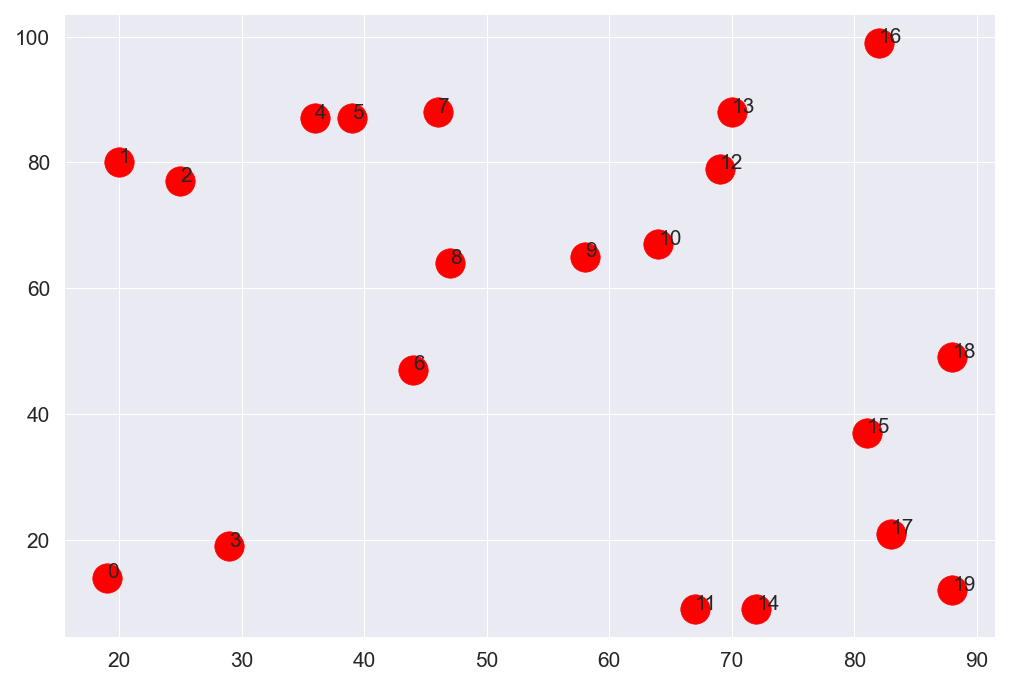

In [3]:
# plot the cities with their names
plt.figure(dpi=150)
plt.grid(linestyle='-', linewidth=0.5)
plt.scatter(cities[:, 0], cities[:, 1], color='red', s=200)
for i, city in enumerate(cities):
    plt.annotate(str(i), (city[0], city[1]))
plt.show()

最佳路径： [15, 8, 9, 6, 2, 1, 4, 18, 5, 13, 12, 16, 19, 14, 11, 3, 0, 7, 10, 17]
最佳距离： 657.6934995255556


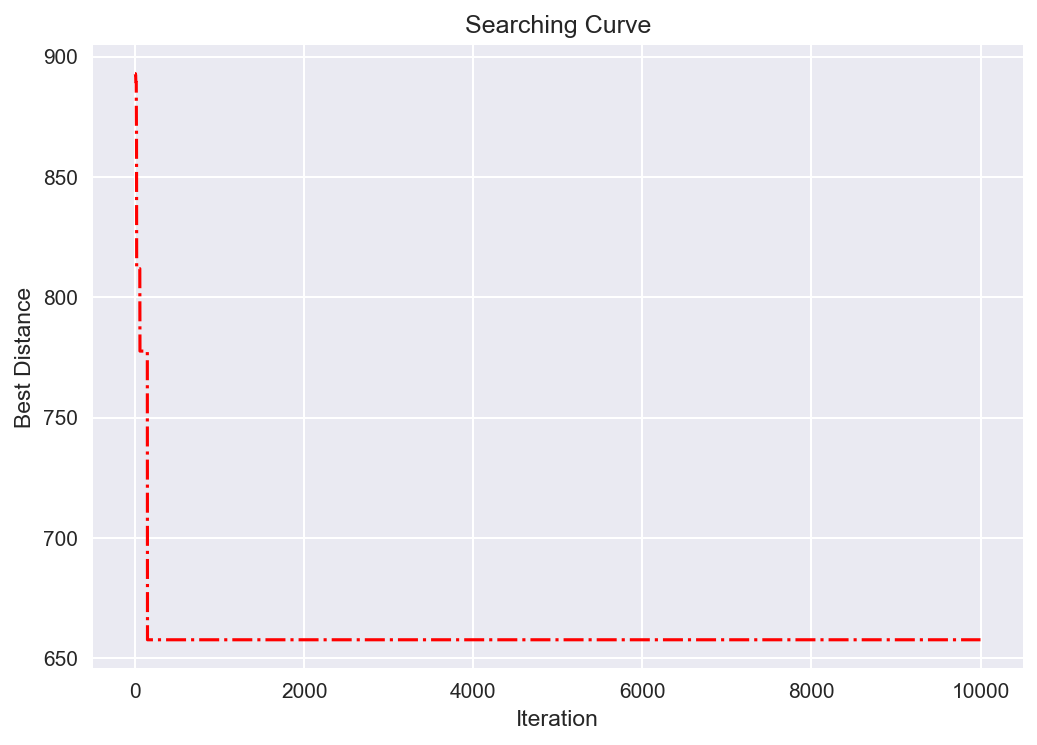

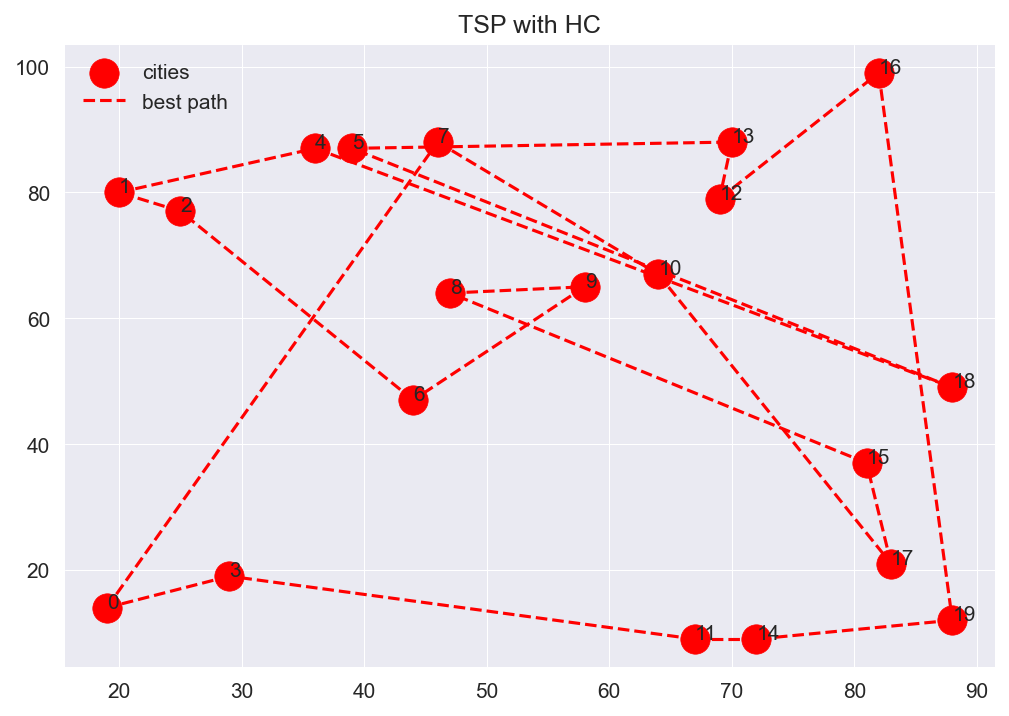

In [4]:
# 爬山算法
num_iterations = 10000

# 运行100爬山算法,每次运行给不同的随机数种子，保留最佳路径和最佳距离
all_best_distance = np.inf
for i in range(100):
    hc = HC(cities, distance, num_iterations)
    hc.set_seed(i)
    best_path, best_distance = hc.hill_climbing()
    if best_distance < all_best_distance:
        all_best_path = best_path
        all_best_distance = best_distance
        best_modelHC = hc


# 输出结果
print("最佳路径：", all_best_path)
print("最佳距离：", all_best_distance)

best_modelHC.plot_learning_curve()
plot_result(cities, all_best_path,model_name='HC')

d:\USR\Programming Practice for Scientific Problems Solving\term-project\SA.py:54: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(


最佳路径： [18, 9, 10, 12, 13, 16, 7, 5, 4, 1, 2, 8, 6, 3, 0, 11, 14, 19, 17, 15]
最佳距离： 345.2808560945127


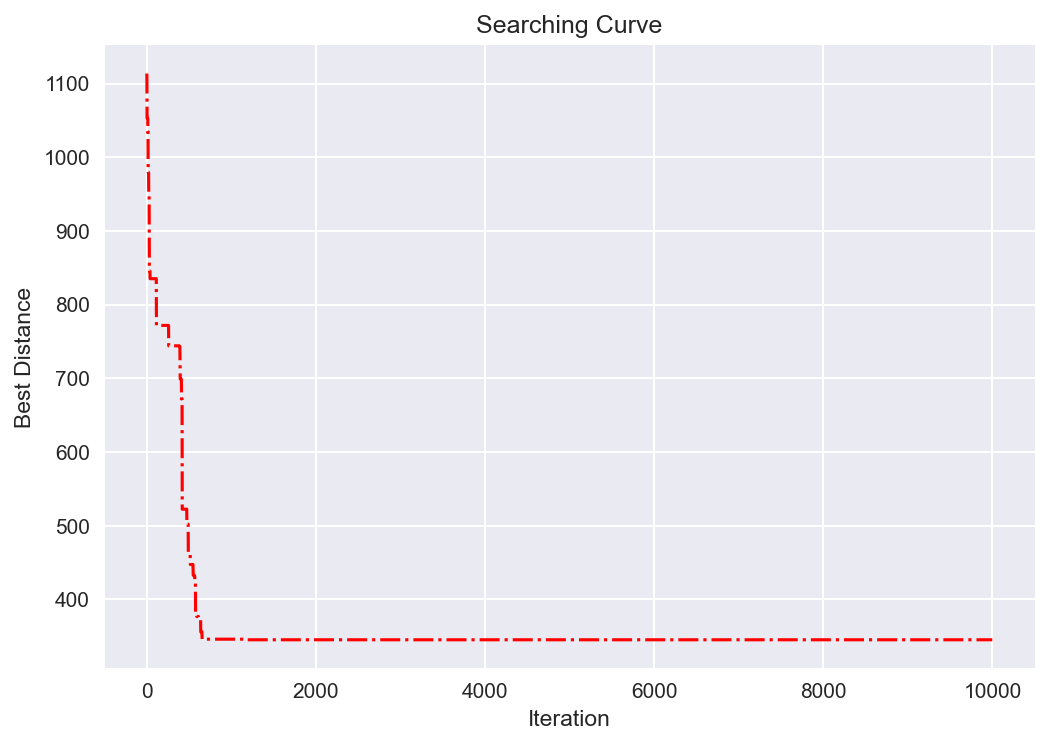

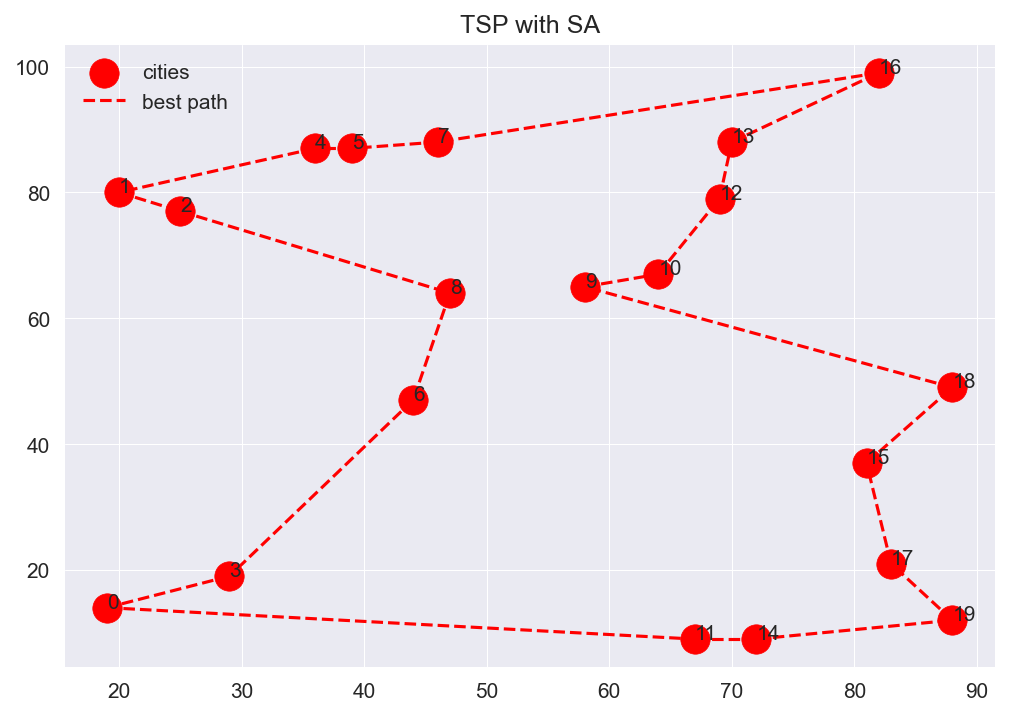

In [5]:
# 模拟退火算法

# 设置算法参数
initial_temperature = 1000
cooling_rate = 0.99
num_iterations = 10000

# 运行200模拟退火算法,每次运行给不同的随机数种子，保留最佳路径和最佳距离
all_best_distance = np.inf
for i in range(200):
    sa = SA(cities, distance, initial_temperature, cooling_rate, num_iterations)
    sa.set_seed(i)
    best_path, best_distance = sa.simulated_annealing()
    if best_distance < all_best_distance:
        all_best_path = best_path
        all_best_distance = best_distance
        best_modelSA = sa


# 输出结果
print("最佳路径：", all_best_path)
print("最佳距离：", all_best_distance)

best_modelSA.plot_learning_curve()
plot_result(cities, all_best_path,model_name='SA')

最佳路径： [9, 10, 12, 13, 16, 7, 5, 4, 1, 2, 8, 6, 3, 0, 11, 14, 19, 17, 15, 18]
最佳距离： 345.2808560945127


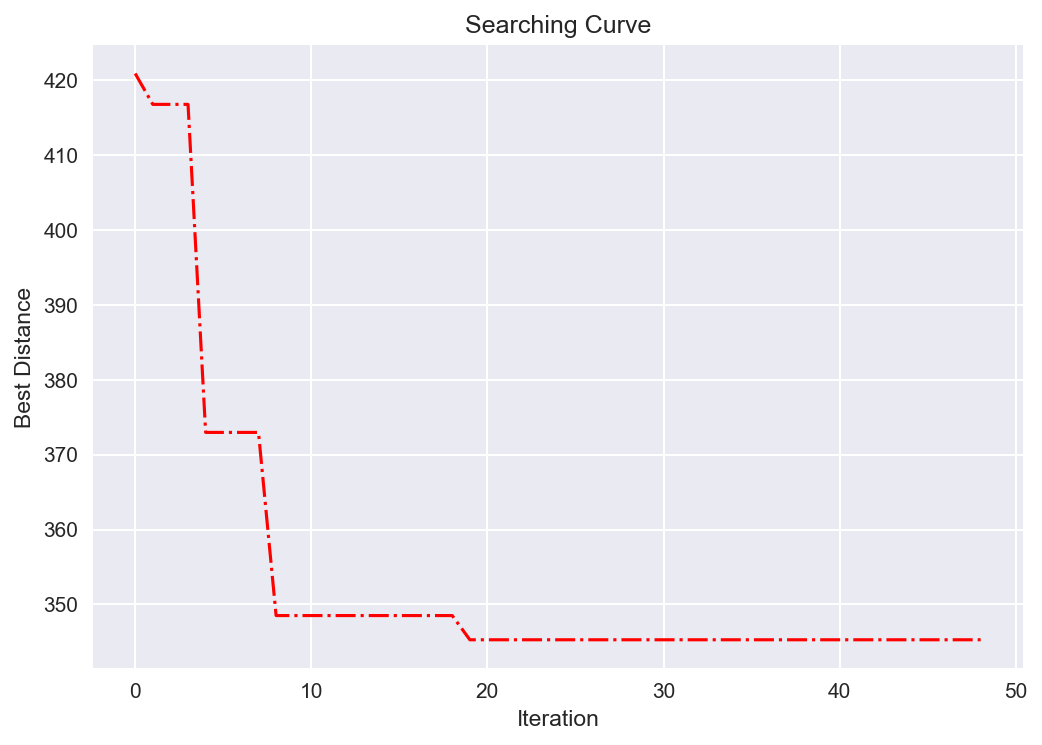

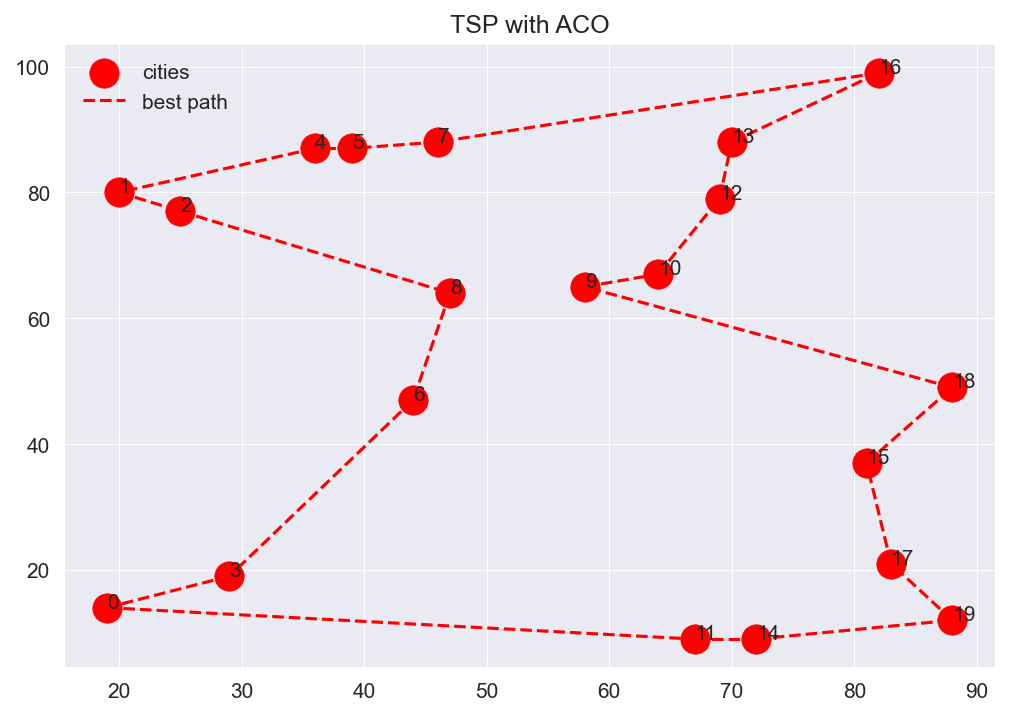

In [6]:
# 蚁群算法
city_num = len(cities)
modelACO = ACO(city_num, distance, ant_num = 50, alpha = 1.0, beta = 2.0, rho = 0.5, Q = 1, iter_max = 50)
modelACO.set_seed(0)
best_path, best_distance = modelACO.ant_colony_algorithm()

# 输出结果
print("最佳路径：", best_path)
print("最佳距离：", best_distance)

modelACO.plot_learning_curve()
plot_result(cities, best_path,model_name='ACO')

最佳路径： [9, 18, 15, 17, 19, 14, 11, 0, 3, 6, 8, 2, 1, 4, 5, 7, 16, 13, 12, 10]
最佳距离： 345.2808560945127


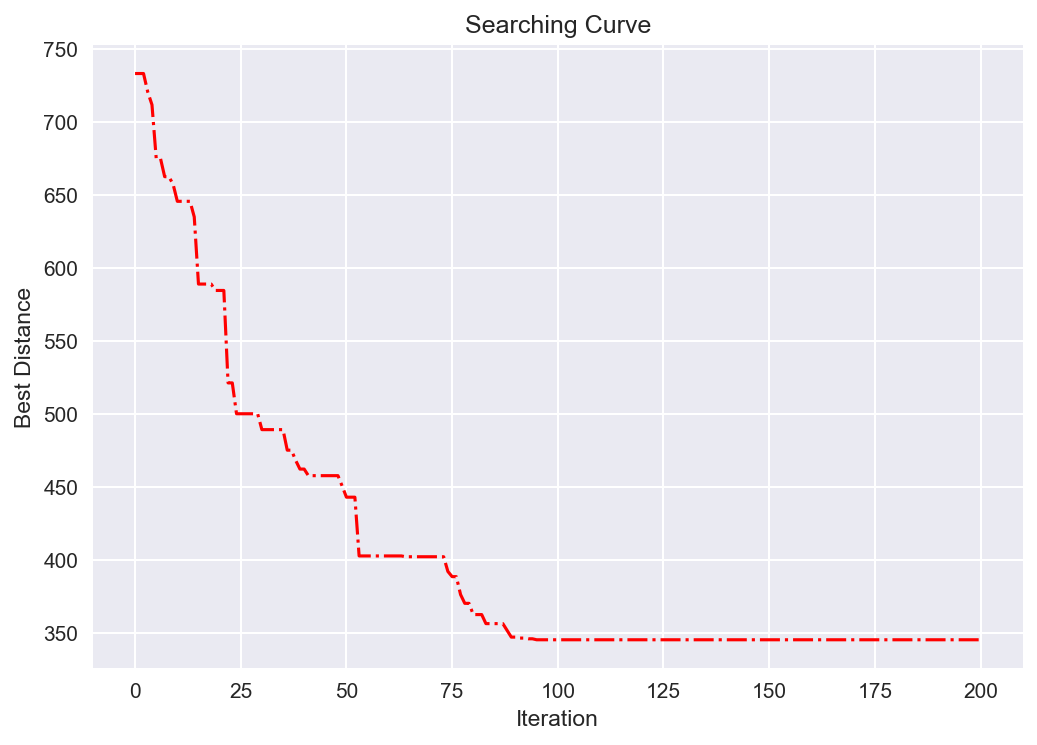

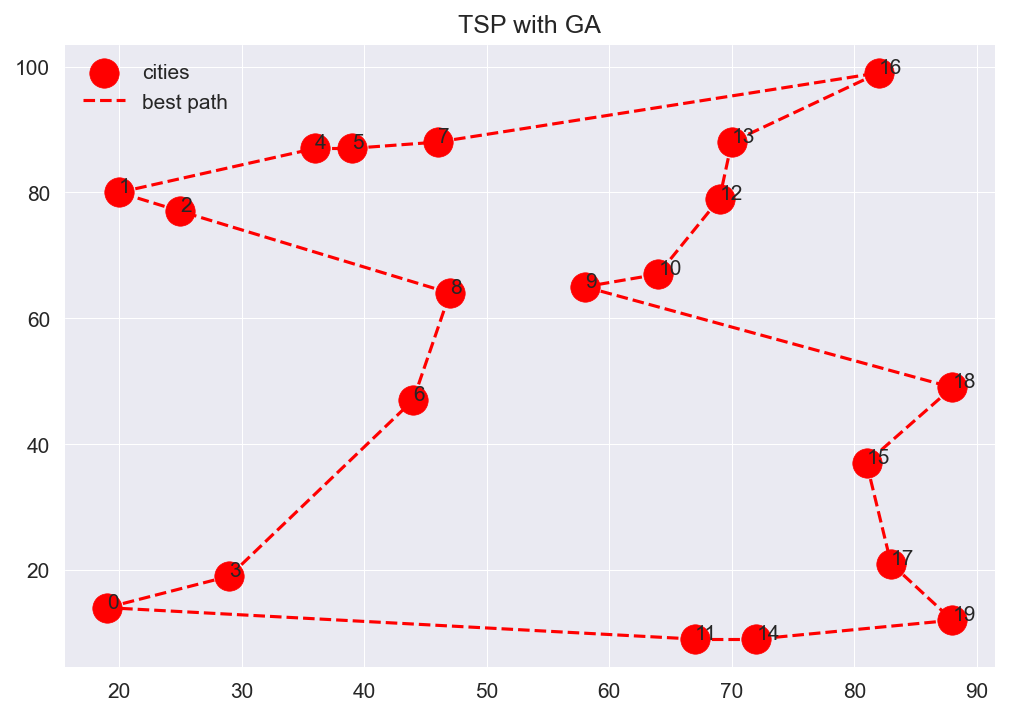

In [7]:
# 遗传算法

# 设置算法参数
pop_size = 100
pc = 0.8
pm = 0.1
iter_max = 200

modelGA = GA(cities, distance, pop_size, pc, pm, iter_max)
modelGA.set_seed(0)
best_path, best_distance = modelGA.genetic_algorithm()

# 输出结果
print("最佳路径：", best_path)
print("最佳距离：", best_distance)

modelGA.plot_learning_curve()
plot_result(cities, best_path,model_name='GA')

In [8]:
# 生成动图
# generate_gif(cities, best_modelHC.best_path_list[:500], model_name='HC',fps=20)
# generate_gif(cities, best_modelSA.best_path_list[:1000], model_name='SA',fps=50)
# generate_gif(cities, modelACO.best_path_list, model_name='ACO', fps=3)
# generate_gif(cities, modelGA.best_path_list, model_name='GA', fps=10)